In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import itertools
from scipy.optimize import curve_fit

random.seed(4)
# Reducing the size of the network

df_edges = pd.read_csv("com-Amazon.csv", delimiter = " ")
OG = nx.from_pandas_edgelist(df_edges, source="From", target="To", create_using= nx.DiGraph) #the original co-purchasing network
edges = random.sample(list(OG.edges()), int(OG.number_of_edges() * 0.15)) # get 15% of the edges in the graph
G=nx.DiGraph()
G.add_edges_from(edges)
largest_cc = max(nx.weakly_connected_components(G), key=len) #find the largest weakly component
G1=G.subgraph(largest_cc) # the final graph with the largest weakly connected component
G2= G1.to_undirected()
G2_node_list= [] # add node that have the degree > 2
for node,degree in G1.degree():
    if degree > 2:
        G2_node_list.append(node)
G2= G1.subgraph(G2_node_list) #creating the graph base on the degree > 2
        
removed_edges = random.sample(list(G2.edges()), int(G2.number_of_edges() * 0.2)) #we will removed 20% of the edges
print(removed_edges) # tuples of node i, node j
G_train = G2.copy()
G_train.remove_edges_from(removed_edges)
G_test = G2.copy()
#G_test.add_edges_from(removed_edges)

G_train=G_train.to_undirected()


#common neighbor

jacard = nx.jaccard_coefficient(G_train)
jacard_pred = []
for u, v, p in jacard:
    jacard_pred.append([u, v, p])
jacard_pred = pd.DataFrame(jacard_pred, columns=['u', 'v', 'jacard'])
jacard_pred = jacard_pred.sort_values(by='jacard', ascending=False)
jacard_pred = jacard_pred.reset_index(drop=True)
jacard_pred.loc[jacard_pred['u'].isin(G_test.nodes()) & jacard_pred['v'].isin(G_test.nodes()), 'label'] = 1
jacard_pred['pred'] = 0
jacard_pred.loc[jacard_pred['jacard'] > 0.15, 'pred'] = 1
pred= []
for i in range(len(jacard_pred)):
    if jacard_pred['pred'][i] == 1:
        comparing= (int(jacard_pred.iloc[i]['u']),int(jacard_pred.iloc[i]['v']),(jacard_pred.iloc[i]['jacard']))
        pred.append(comparing)
        
print(pred)

[(64321, 25441), (266115, 9660), (121115, 88550), (252444, 88359), (69157, 17421), (331462, 107892), (304510, 214672), (309536, 83349), (326945, 111900), (301931, 104250), (198684, 20059), (201498, 32466), (126759, 64321), (272141, 216222), (271176, 81726), (264582, 101718), (155291, 80326), (270452, 230087), (301682, 297101), (148768, 41687), (203204, 64219), (205346, 91832), (332324, 167800), (240915, 180870), (283056, 257921), (61152, 46189), (302841, 275407), (269419, 75213), (157088, 107749), (55639, 26770), (251610, 121450), (261326, 237451), (321889, 292537), (313100, 73249), (176487, 148186), (173132, 90767), (197345, 158775), (284718, 193073), (234089, 88160), (318556, 25951), (260397, 12077), (118822, 46141), (312177, 58354), (297557, 238039), (331170, 167266), (161749, 76958), (216181, 6410), (259862, 101834), (62903, 10619), (208363, 113090), (228648, 130572), (98226, 56183), (249363, 155600), (245382, 235268), (333428, 168078), (243583, 112721), (109838, 70025), (273653, 2

[(331504, 333444, 1.0), (100172, 171617, 1.0), (313540, 243143, 1.0), (66422, 217183, 1.0), (118673, 284822, 1.0), (140902, 21498, 1.0), (82275, 234853, 1.0), (18376, 212016, 1.0), (150838, 300105, 1.0), (181273, 39699, 1.0), (55482, 309818, 1.0), (16484, 29837, 1.0), (176349, 234752, 1.0), (304127, 282036, 1.0), (243462, 40542, 1.0), (142085, 225712, 1.0), (9739, 240004, 1.0), (249766, 102571, 1.0), (57350, 331328, 1.0), (125354, 97449, 1.0), (124499, 201936, 1.0), (312280, 72196, 1.0), (150961, 323672, 1.0), (68324, 283179, 1.0), (65945, 68324, 1.0), (115670, 167044, 1.0), (178000, 81385, 1.0), (191409, 44504, 1.0), (60608, 317994, 1.0), (141064, 333444, 1.0), (291341, 324433, 1.0), (331791, 155250, 1.0), (132092, 318556, 1.0), (263856, 283914, 1.0), (266517, 201868, 1.0), (262500, 255806, 1.0), (104810, 48343, 1.0), (8512, 3903, 1.0), (60871, 334648, 1.0), (150838, 70215, 1.0), (197302, 46764, 1.0), (105594, 163264, 1.0), (217155, 309566, 1.0), (206672, 87778, 1.0), (59032, 264151, 

[2, 3, 4]

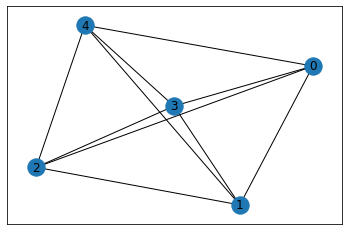

In [3]:
tuple_1= [(1,2),(2,1)]
tuple_2= [(2,3), (3,4), (1,2)]
for i in range(len(tuple_1)):
    tuple_1[i][1]

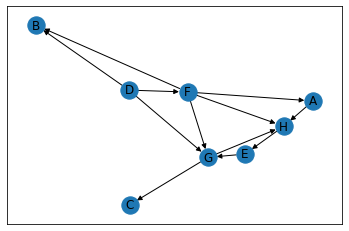

False


AttributeError: module 'networkx' has no attribute 'weakly_connected_graph'

In [107]:
left = tuple("ADDDEFFFFGGH")
right = tuple("HBFGGABGHHCE")
directed_2 = nx.DiGraph()
directed_2.add_edges_from(list(zip(left, right)))
nx.draw_networkx(directed_2, with_labels=True)
plt.show()
print(nx.is_strongly_connected(directed_2))
list_of_subgraphs = list(nx.weakly_connected_graph(directed_2))
list_of_digraphs = []
for subgraph in list_of_subgraphs:
    list_of_digraphs.append(nx.subgraph(directed_2, subgraph))
for i in range(len(list_of_digraphs)):
    nx.draw_networkx(list_of_digraphs[i])
    plt.show()
    

# for component in nx.strongly_connected_components(directed_2):
#     if (len(component)) < 2:
#         print(component

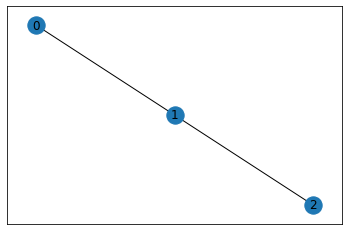

[(0, 1), (1, 2)]


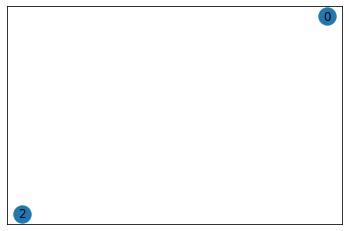

In [71]:
G = nx.path_graph(3)  # or DiGraph, MultiGraph, MultiDiGraph, etc
nx.draw_networkx(G)
plt.show()
print(list(G.edges))
G.remove_node(1)
nx.draw_networkx(G)
plt.show()